In [236]:
import numpy as np 
import pandas as pd 

One binary class divided in edible=e and poisonous=p (with the latter one also containing mushrooms of unknown edibility).
Twenty remaining variables (n: nominal, m: metrical)
1. cap-diameter (m): float number in cm
2. cap-shape (n): bell=b, conical=c, convex=x, flat=f,sunken=s, spherical=p, others=o
3. cap-surface (n): fibrous=i, grooves=g, scaly=y, smooth=s,shiny=h, leathery=l, silky=k, sticky=t,wrinkled=w, fleshy=e
4. cap-color (n): brown=n, buff=b, gray=g, green=r, pink=p,purple=u, red=e, white=w, yellow=y, blue=l,orange=o, black=k
5. does-bruise-bleed (n): bruises-or-bleeding=t,no=f
6. gill-attachment (n): adnate=a, adnexed=x, decurrent=d, free=e,sinuate=s, pores=p, none=f, unknown=?
7. gill-spacing (n): close=c, distant=d, none=f
8. gill-color (n): see cap-color + none=f
9. stem-height (m): float number in cm
10. stem-width (m): float number in mm
11. stem-root (n): bulbous=b, swollen=s, club=c, cup=u, equal=e,rhizomorphs=z, rooted=r
12. stem-surface (n): see cap-surface + none=f
13. stem-color (n): see cap-color + none=f
14. veil-type (n): partial=p, universal=u
15. veil-color (n): see cap-color + none=f
16. has-ring (n): ring=t, none=f
17. ring-type (n): cobwebby=c, evanescent=e, flaring=r, grooved=g,large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?
18. spore-print-color (n): see cap color
19. habitat (n): grasses=g, leaves=l, meadows=m, paths=p, heaths=h,urban=u, waste=w, woods=d
20. season (n): spring=s, summer=u, autumn=a, winter=w

Class Labels
poison=p,  edible=e


In [237]:
# importing the libraries
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [238]:
df_mr=pd.read_csv('secondary_data.csv', sep=';')

In [239]:
df_mr.head(10)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
5,p,15.34,x,g,o,f,e,NaN,w,17.84,...,s,y,w,u,w,t,p,NaN,d,u
6,p,14.85,f,h,o,f,e,NaN,w,17.71,...,s,y,w,u,w,t,g,NaN,d,w
7,p,14.86,x,h,e,f,e,NaN,w,17.03,...,s,y,w,u,w,t,p,NaN,d,u
8,p,12.85,f,g,o,f,e,NaN,w,17.27,...,s,y,w,u,w,t,p,NaN,d,a
9,p,13.55,f,g,e,f,e,NaN,w,16.04,...,s,y,w,u,w,t,p,NaN,d,w


In [240]:
df_mr['stem-width']

0        17.09
1        18.19
2        17.74
3        15.98
4        17.20
         ...  
61064     6.22
61065     5.43
61066     6.37
61067     5.44
61068     5.45
Name: stem-width, Length: 61069, dtype: float64

In [241]:
df_mr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [242]:
my_tab = pd.crosstab(index=df_mr["cap-surface"], columns="Count")

In [243]:
my_tab=my_tab.sort_values('Count', ascending=[False])
print(my_tab)

col_0        Count
cap-surface       
t             8196
s             7608
y             6341
h             4974
g             4724
d             4432
e             2584
k             2303
i             2225
w             2150
l             1412


In [244]:
my_tab = pd.crosstab(index=df_mr["gill-attachment"], columns="Count")

In [245]:
my_tab=my_tab.sort_values('Count', ascending=[False])
print(my_tab)

col_0            Count
gill-attachment       
a                12698
d                10247
x                 7413
p                 6001
e                 5648
s                 5648
f                 3530


#### From the dataset the gill-attachment have unknow with  ?. I change the ? to NAN and give the unkow to be u

In [246]:
df_mr.replace('?', np.nan, inplace=True)

In [247]:
df_mr['gill-attachment'] = df_mr['gill-attachment'].fillna('u')

In [248]:
my_tab = pd.crosstab(index=df_mr["gill-attachment"], columns="Count")
my_tab=my_tab.sort_values('Count', ascending=[False])
print(my_tab)

col_0            Count
gill-attachment       
a                12698
d                10247
u                 9884
x                 7413
p                 6001
e                 5648
s                 5648
f                 3530


In [249]:
df_mr['gill-attachment'].count

<bound method Series.count of 0        e
1        e
2        e
3        e
4        e
        ..
61064    f
61065    f
61066    f
61067    f
61068    f
Name: gill-attachment, Length: 61069, dtype: object>

In [250]:
my_tab = pd.crosstab(index=df_mr["gill-spacing"], columns="Count")

In [251]:
my_tab=my_tab.sort_values('Count', ascending=[False])
print(my_tab)

col_0         Count
gill-spacing       
c             24710
d              7766
f              3530


In [252]:
my_tab = pd.crosstab(index=df_mr["stem-root"], columns="Count")
my_tab=my_tab.sort_values('Count', ascending=[False])
print(my_tab)

col_0      Count
stem-root       
b           3177
s           3177
r           1412
f           1059
c            706


In [253]:
my_tab = pd.crosstab(index=df_mr["stem-surface"], columns="Count")
my_tab=my_tab.sort_values('Count', ascending=[False])
print(my_tab)

col_0         Count
stem-surface       
s              6025
y              4940
i              4396
t              2644
g              1765
k              1581
f              1059
h               535


In [254]:
my_tab = pd.crosstab(index=df_mr["veil-type"], columns="Count")
my_tab=my_tab.sort_values('Count', ascending=[False])
print(my_tab)

col_0      Count
veil-type       
u           3177


<Axes: xlabel='col_0'>

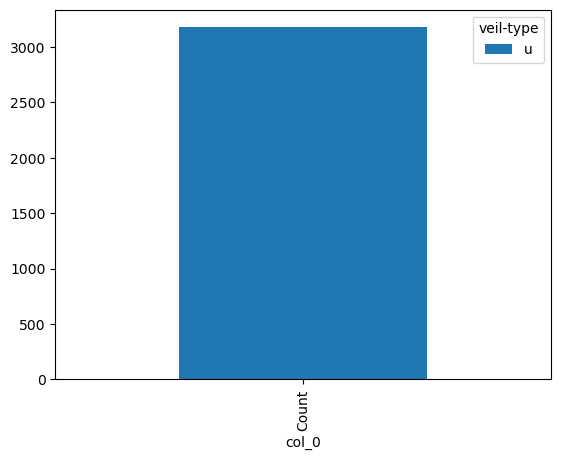

In [255]:
data_counts = pd.DataFrame(my_tab)
pd.DataFrame(data_counts).transpose().plot(kind='bar', stacked=False)

In [256]:
my_tab = pd.crosstab(index=df_mr["veil-color"], columns="Count")
my_tab=my_tab.sort_values('Count', ascending=[False])
print(my_tab)

col_0       Count
veil-color       
w            5474
y             527
n             525
k             353
u             353
e             181


In [257]:
my_tab = pd.crosstab(index=df_mr["ring-type"], columns="Count")
my_tab=my_tab.sort_values('Count', ascending=[False])
print(my_tab)

col_0      Count
ring-type       
f          48361
e           2435
z           2118
l           1427
r           1399
p           1265
g           1240
m            353


From the dataset the ring-type have unknow with ?. I change the ? to NAN and give the unkow to be u

In [258]:
df_mr['ring-type'] = df_mr['ring-type'].fillna('u')

In [259]:
my_tab = pd.crosstab(index=df_mr["ring-type"], columns="Count")
my_tab=my_tab.sort_values('Count', ascending=[False])
print(my_tab)

col_0      Count
ring-type       
f          48361
u           2471
e           2435
z           2118
l           1427
r           1399
p           1265
g           1240
m            353


In [260]:
my_tab = pd.crosstab(index=df_mr["spore-print-color"], columns="Count")
my_tab=my_tab.sort_values('Count', ascending=[False]) 
print(my_tab)

col_0              Count
spore-print-color       
k                   2118
p                   1259
w                   1212
n                   1059
g                    353
u                    182
r                    171


In [261]:
my_tab = pd.crosstab(index=df_mr["gill-color"], columns="Count")
my_tab=my_tab.sort_values('Count', ascending=[False])  
print(my_tab)

col_0       Count
gill-color       
w           18521
n            9645
y            9546
p            5983
g            4118
f            3530
o            2909
k            2375
r            1399
e            1066
u            1023
b             954


In [262]:
my_tab = pd.crosstab(index=df_mr["class"], columns="Count")
my_tab=my_tab.sort_values('Count', ascending=[False])
print(my_tab)

col_0  Count
class       
p      33888
e      27181


<Axes: xlabel='col_0'>

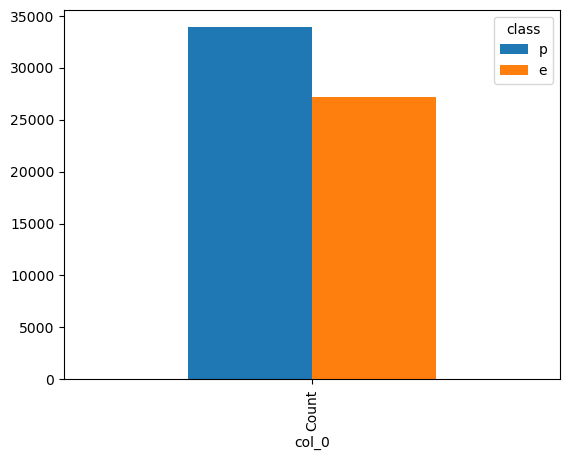

In [263]:
data_counts = pd.DataFrame(my_tab)
pd.DataFrame(data_counts).transpose().plot(kind='bar', stacked=False)

In [264]:
df_mr['veil-type'].isna().sum()

57892

In [265]:
df_mr[df_mr.isna().any(axis=1)]

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [266]:
def proportional_imputation(series):
    # Calculate the probability distribution of the non-missing categories
    probs = series.value_counts(normalize=True)
    
    # Fill missing values based on these probabilities
    missing_indices = series[series.isna()].index
    imputed_values = np.random.choice(probs.index, size=len(missing_indices), p=probs.values)
    
    # Replace missing values with imputed values
    series.loc[missing_indices] = imputed_values

    return series

In [267]:
df_mr['cap-surface'] = proportional_imputation(df_mr['cap-surface'])

C:\Users\modol\AppData\Local\Temp\ipykernel_23308\1954374760.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series.loc[missing_indices] = imputed_values


In [268]:
my_tab = pd.crosstab(index=df_mr["cap-surface"], columns="Count")

In [269]:
df_mr['gill-spacing'] = proportional_imputation(df_mr['gill-spacing'])
my_tab = pd.crosstab(index=df_mr["gill-spacing"], columns="Count")

C:\Users\modol\AppData\Local\Temp\ipykernel_23308\1954374760.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series.loc[missing_indices] = imputed_values


In [270]:
df_mr['gill-spacing'].isna().sum()

0

In [271]:
df_mr['stem-surface'] = proportional_imputation(df_mr['stem-surface'])
my_tab = pd.crosstab(index=df_mr["stem-surface"], columns="Count")

C:\Users\modol\AppData\Local\Temp\ipykernel_23308\1954374760.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series.loc[missing_indices] = imputed_values


In [272]:
df_mr['stem-root'] = proportional_imputation(df_mr['stem-root'])
my_tab = pd.crosstab(index=df_mr["stem-root"], columns="Count")

C:\Users\modol\AppData\Local\Temp\ipykernel_23308\1954374760.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series.loc[missing_indices] = imputed_values


In [273]:
df_mr['spore-print-color'] = proportional_imputation(df_mr['spore-print-color'])
my_tab = pd.crosstab(index=df_mr["spore-print-color"], columns="Count")

C:\Users\modol\AppData\Local\Temp\ipykernel_23308\1954374760.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series.loc[missing_indices] = imputed_values


In [274]:
df_mr['stem-width_cm'] = df_mr['stem-width']/10

In [275]:
df_mr.drop(['stem-width'], axis=1, inplace=True)

In [276]:
df_mr.drop(['veil-color'], axis=1, inplace=True)

In [277]:
df_mr.drop(['veil-type'], axis=1, inplace=True)

In [278]:
label_encoder = LabelEncoder()
# Apply LabelEncoder to the categorical column
df_mr['class'] = label_encoder.fit_transform(df_mr['class'])

In [279]:
print(df_mr.columns)

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-root', 'stem-surface', 'stem-color', 'has-ring',
       'ring-type', 'spore-print-color', 'habitat', 'season', 'stem-width_cm'],
      dtype='object')


In [280]:
print(df_mr)

       class  cap-diameter cap-shape cap-surface cap-color  \
0          1         15.26         x           g         o   
1          1         16.60         x           g         o   
2          1         14.07         x           g         o   
3          1         14.17         f           h         e   
4          1         14.64         x           h         o   
...      ...           ...       ...         ...       ...   
61064      1          1.18         s           s         y   
61065      1          1.27         f           s         y   
61066      1          1.27         s           s         y   
61067      1          1.24         f           s         y   
61068      1          1.17         s           s         y   

      does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
0                        f               e            c          w   
1                        f               e            c          w   
2                        f               e   

In [281]:
df_mr[df_mr.isna().any(axis=1)]

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-root,stem-surface,stem-color,has-ring,ring-type,spore-print-color,habitat,season,stem-width_cm


In [282]:
y = pd.DataFrame(df_mr['class'])
x = pd.DataFrame(df_mr.drop('class', axis = 1))
x.columns

Index(['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-root', 'stem-surface', 'stem-color', 'has-ring',
       'ring-type', 'spore-print-color', 'habitat', 'season', 'stem-width_cm'],
      dtype='object')

## Detecting Outliers 

In [283]:
columns_of_interest = ['cap-diameter','stem-height','stem-width_cm']
df_mr[columns_of_interest].describe()

,cap-diameter,stem-height,stem-width_cm
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,1.214941
std,5.264845,3.370017,1.003596
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,0.521000
50%,5.860000,5.950000,1.019000
75%,8.540000,7.740000,1.657000
max,62.340000,33.920000,10.391000


In [284]:
df_mr[columns_of_interest].skew()

cap-diameter     3.822844
stem-height      2.020904
stem-width_cm    2.164957
dtype: float64

In [285]:
df_mr[columns_of_interest].kurtosis()

cap-diameter     27.077467
stem-height       7.682672
stem-width_cm     8.768399
dtype: float64

In [286]:
def plotGraph (dataset, feature):
    #plt.style.use('solarize_Light2')
    plt.figure(figsize=(15,10))
    plt.subplot(2,2,1)
    plt.title(f'{feature}Distribution Graph')
    sns.distplot(dataset[feature], color='red')
    
    plt.subplot(2,2,2)
    plt.title(f'{feature}Histogram Graph',color='red')
    sns.histplot(dataset[feature], color='red', kde=True, bins=10)
    
    plt.subplot(2,2,3)
    plt.title(f'{feature}Boxplot')
    sns.boxplot(dataset[feature], color='red')
    plt.show()
    

C:\Users\modol\AppData\Local\Temp\ipykernel_23308\4289267633.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[feature], color='red')


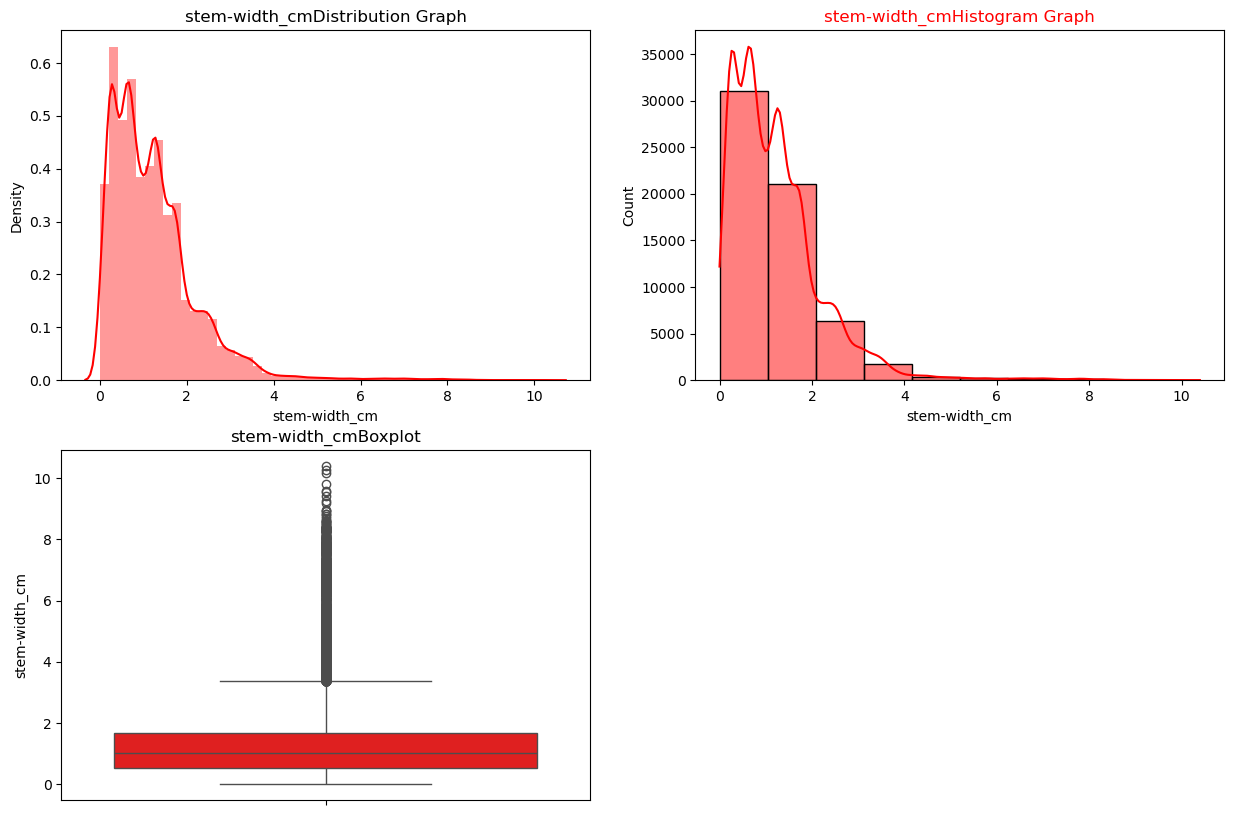

In [287]:
plotGraph(x,'stem-width_cm')

C:\Users\modol\AppData\Local\Temp\ipykernel_23308\4289267633.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[feature], color='red')


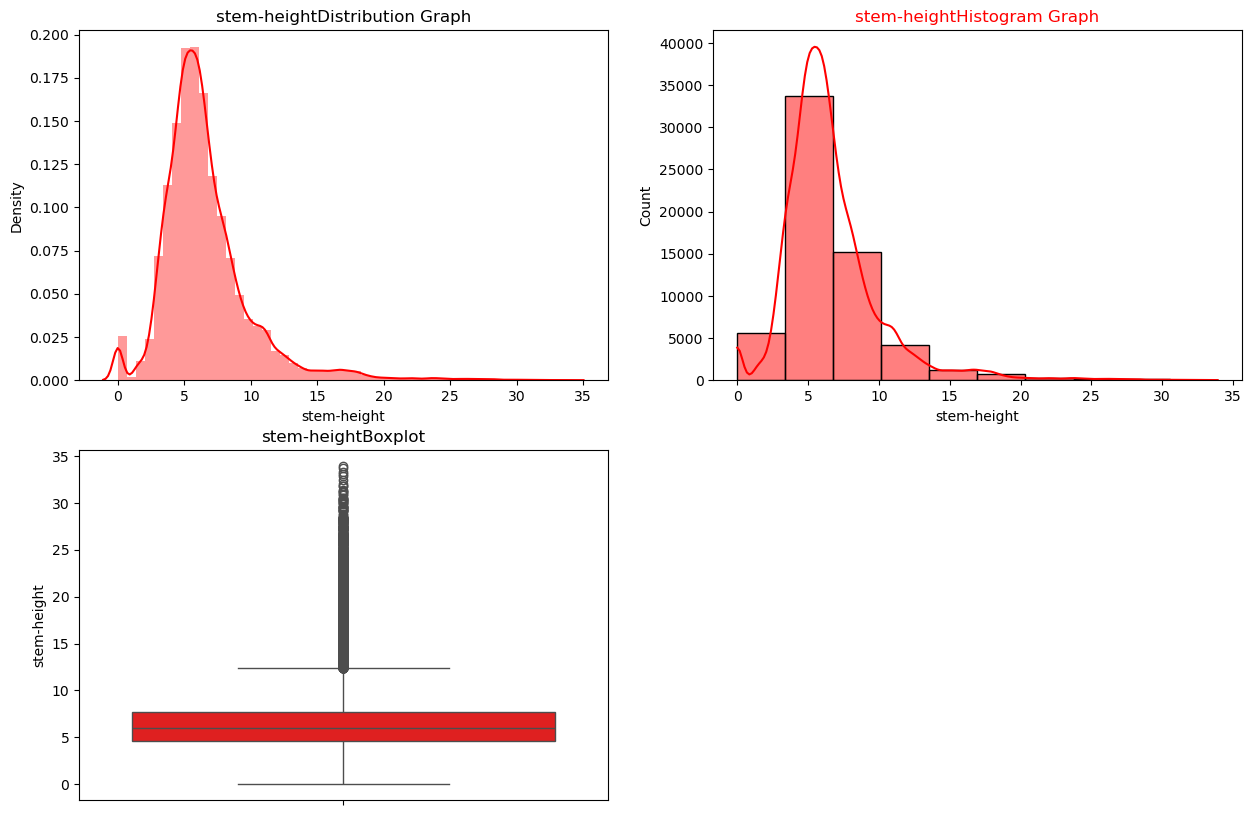

In [288]:
plotGraph(x,'stem-height')

C:\Users\modol\AppData\Local\Temp\ipykernel_23308\4289267633.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[feature], color='red')


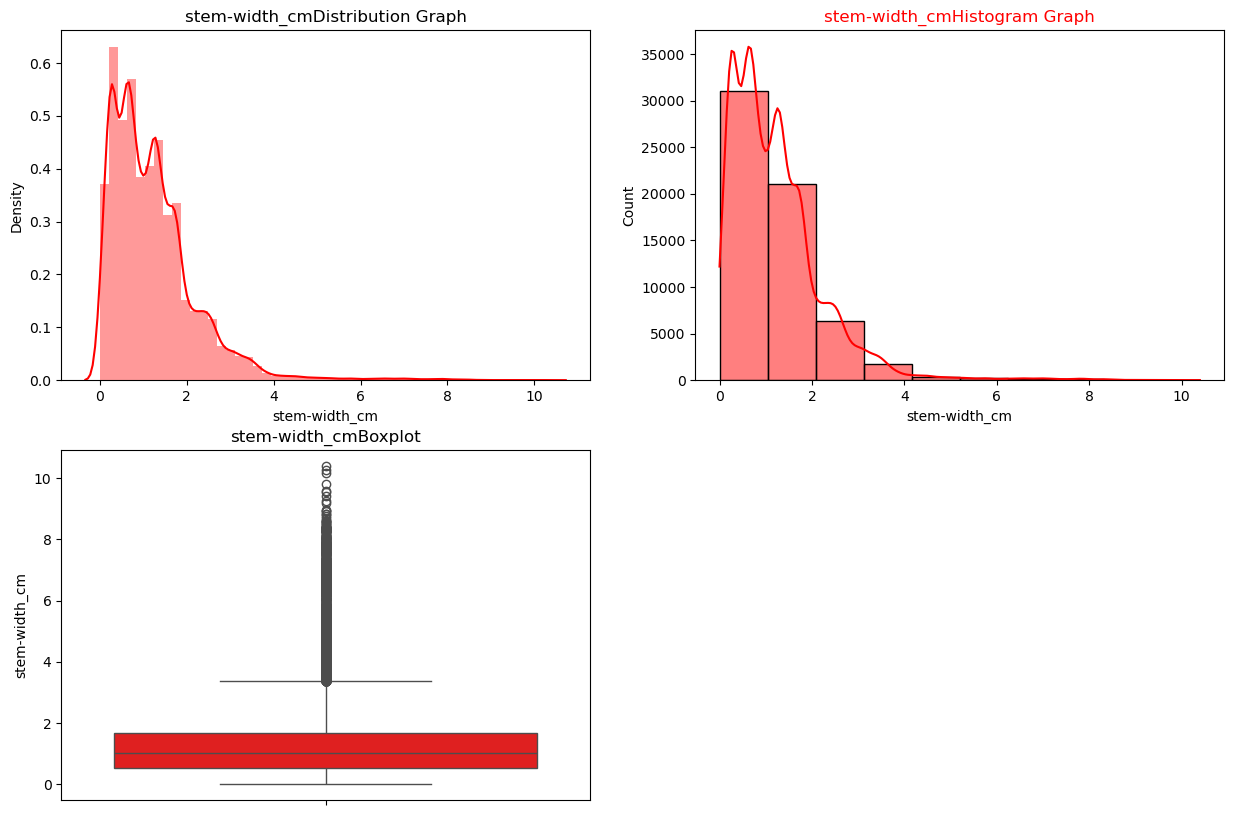

In [289]:
plotGraph(x,'stem-width_cm')

## Removing Outliers 

In [290]:
def detect_outliers_iqr(df_mr, feature):
    Q1 = df_mr[feature].quantile(0.25)
    Q3 = df_mr[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_mr[(df_mr[feature] < lower_bound) | (df_mr[feature] > upper_bound)].index
    return outliers

In [291]:
for feature in ['cap-diameter', 'stem-height', 'stem-width_cm']:
    outlier_indices = detect_outliers_iqr(df_mr, feature)
    median_value = df_mr[feature].median()
    df_mr.loc[outlier_indices, feature] = median_value  # Impute outliers with median value

print("\nData after imputing outliers:\n", df_mr)


Data after imputing outliers:
        class  cap-diameter cap-shape cap-surface cap-color  \
0          1         15.26         x           g         o   
1          1          5.86         x           g         o   
2          1         14.07         x           g         o   
3          1         14.17         f           h         e   
4          1         14.64         x           h         o   
...      ...           ...       ...         ...       ...   
61064      1          1.18         s           s         y   
61065      1          1.27         f           s         y   
61066      1          1.27         s           s         y   
61067      1          1.24         f           s         y   
61068      1          1.17         s           s         y   

      does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
0                        f               e            c          w   
1                        f               e            c          w   
2            

In [292]:
df_mr.shape

(61069, 19)

In [293]:
df_mr.to_csv('mushroom_cleaned.csv', index=False)

# Data Preparation

In [294]:
y = pd.DataFrame(df_mr['class'])
x = pd.DataFrame(df_mr.drop('class', axis = 1))
x.columns

Index(['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-root', 'stem-surface', 'stem-color', 'has-ring',
       'ring-type', 'spore-print-color', 'habitat', 'season', 'stem-width_cm'],
      dtype='object')

In [295]:
y.columns

Index(['class'], dtype='object')

C:\Users\modol\AppData\Local\Temp\ipykernel_23308\4289267633.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[feature], color='red')


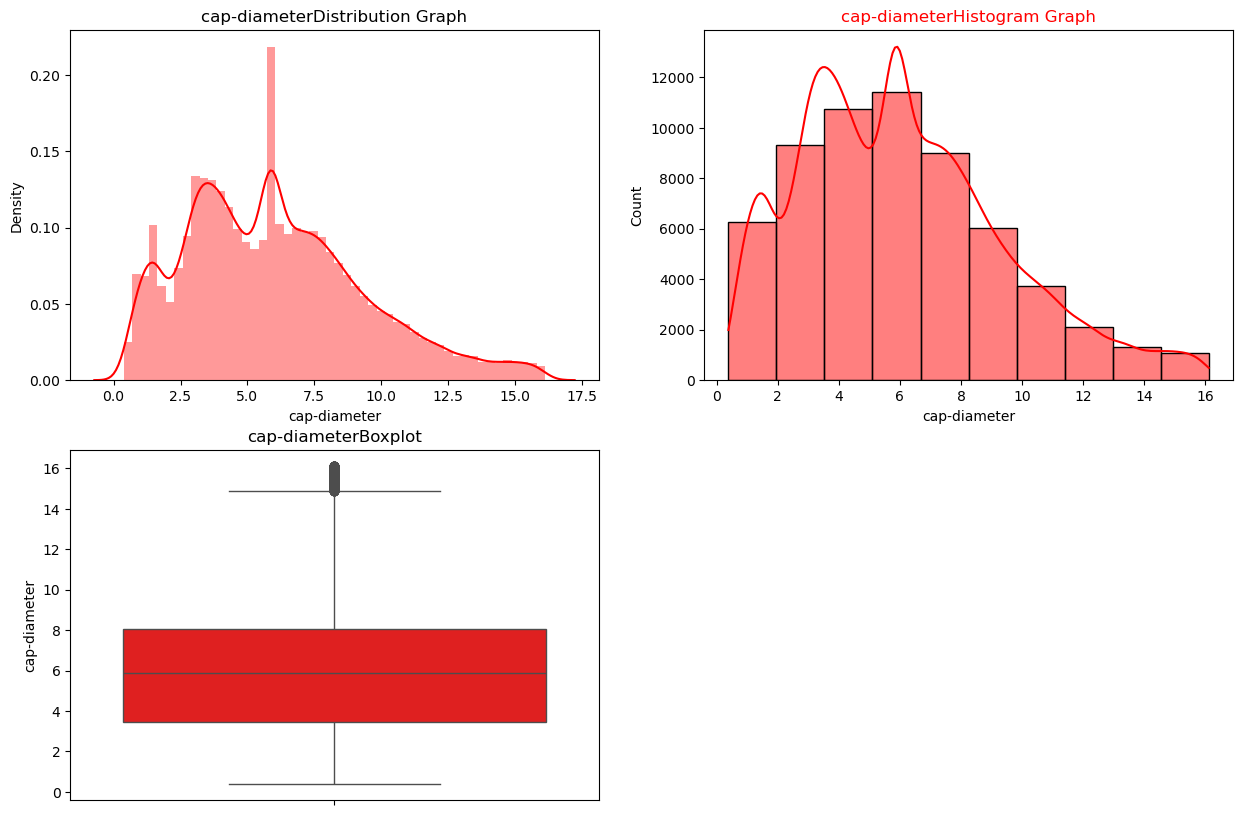

In [296]:
plotGraph(x,'cap-diameter')

C:\Users\modol\AppData\Local\Temp\ipykernel_23308\4289267633.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[feature], color='red')


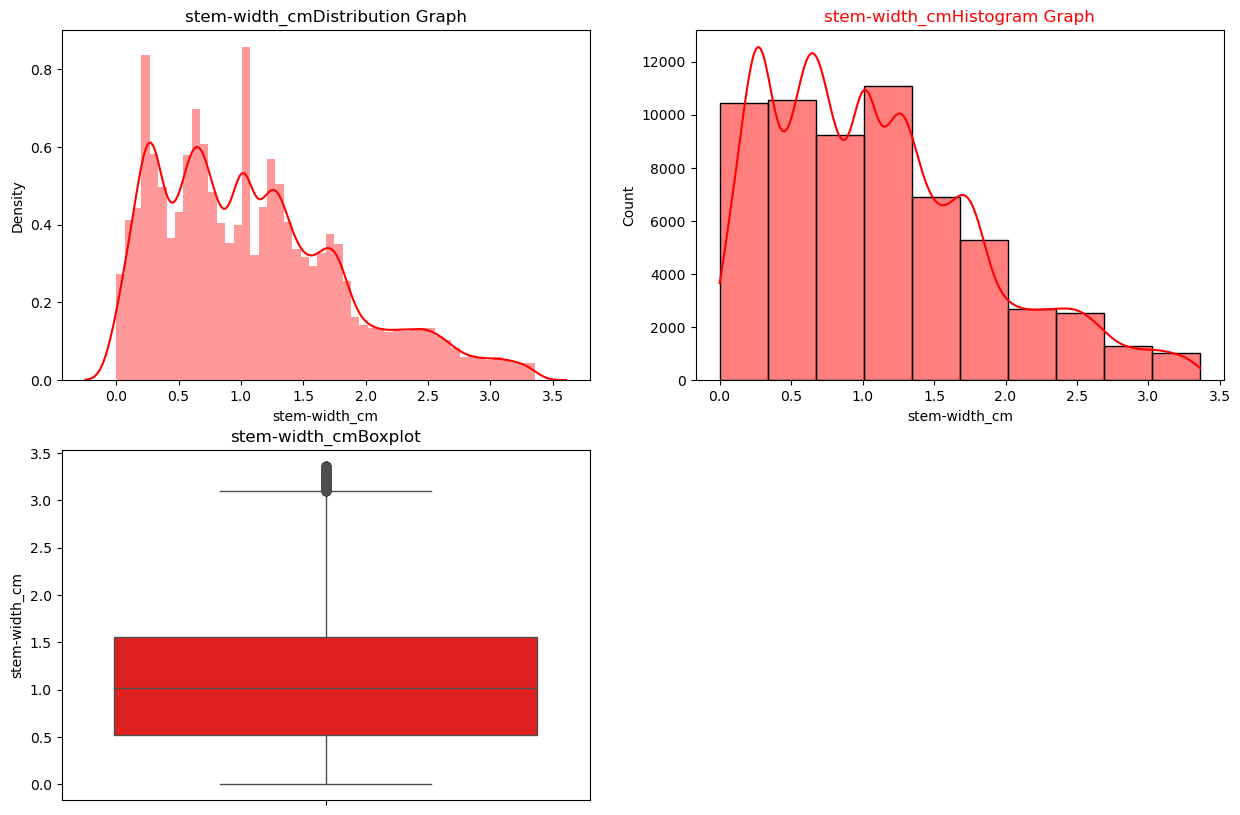

In [297]:
plotGraph(x,'stem-width_cm')

C:\Users\modol\AppData\Local\Temp\ipykernel_23308\4289267633.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[feature], color='red')


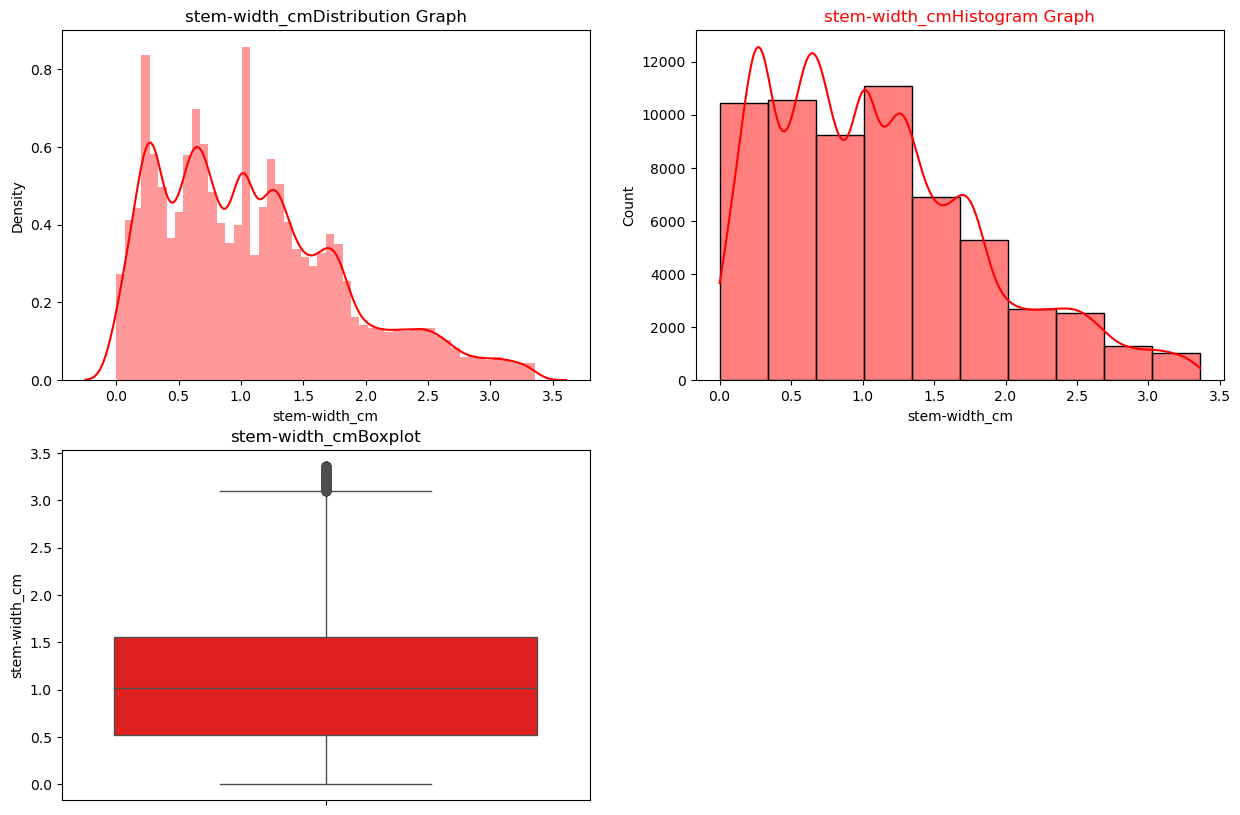

In [298]:
plotGraph(x,'stem-width_cm')

In [299]:
scaler = MinMaxScaler()
numerical = ['cap-diameter', 'stem-height', 'stem-width_cm']
x[numerical] = scaler.fit_transform(df_mr[numerical])

In [300]:
display(x[numerical].head(n = 1))

,cap-diameter,stem-height,stem-width_cm
0,0.945362,0.480226,0.50848


In [301]:
X = pd.get_dummies(x, columns=['cap-shape', 'cap-surface', 'cap-color','does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root', 'stem-surface', 'stem-color', 'has-ring','ring-type',
'spore-print-color', 'habitat', 'season'])
X = X.astype(float)

In [302]:
display(X.head(1),y.head(1))


,cap-diameter,stem-height,stem-width_cm,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_x,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,0.945362,0.480226,0.50848,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


,class
0,1


In [303]:
encoded = list(X.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

114 total features after one-hot encoding.


In [304]:
print(encoded)

['cap-diameter', 'stem-height', 'stem-width_cm', 'cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_o', 'cap-shape_p', 'cap-shape_s', 'cap-shape_x', 'cap-surface_d', 'cap-surface_e', 'cap-surface_g', 'cap-surface_h', 'cap-surface_i', 'cap-surface_k', 'cap-surface_l', 'cap-surface_s', 'cap-surface_t', 'cap-surface_w', 'cap-surface_y', 'cap-color_b', 'cap-color_e', 'cap-color_g', 'cap-color_k', 'cap-color_l', 'cap-color_n', 'cap-color_o', 'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w', 'cap-color_y', 'does-bruise-or-bleed_f', 'does-bruise-or-bleed_t', 'gill-attachment_a', 'gill-attachment_d', 'gill-attachment_e', 'gill-attachment_f', 'gill-attachment_p', 'gill-attachment_s', 'gill-attachment_u', 'gill-attachment_x', 'gill-spacing_c', 'gill-spacing_d', 'gill-spacing_f', 'gill-color_b', 'gill-color_e', 'gill-color_f', 'gill-color_g', 'gill-color_k', 'gill-color_n', 'gill-color_o', 'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w', 'gill-color_y', 'stem-root_b'

In [305]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 42)

In [306]:
X_train = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
y_train = y_train.values if isinstance(y_train, pd.DataFrame) else y_train

In [307]:
X_train[0]

array([0.13278272, 0.28490718, 0.32014281, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [308]:
(X_train.shape,X_test.shape)

((48855, 114), (12214, 114))

In [309]:
(y_train.shape,y_test.shape)

((48855, 1), (12214, 1))

# MultiLayers Perceptron 

In [310]:
def create_model():
    model = keras.Sequential([
        layers.Dense(114, activation="relu"),
        layers.Dense(57, activation="relu"),
        layers.Dense(29, activation="relu"),
        layers.Dense(7, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer="rmsprop",
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    return model

## KFold Cross Validation 

In [311]:
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# List to store accuracy for each fold
accuracy_per_fold = []

# Perform K-Fold Cross-Validation
fold_no = 1
for train_index, val_index in kf.split(X_train):
    print(f'Fold {fold_no}')
    
    # Split the data
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    # Create a new instance of the model for each fold
    model = create_model()
    
    # Train the model
    history=model.fit(X_train_fold, y_train_fold, epochs=35, batch_size=64, verbose=0,validation_data=(X_val_fold, y_val_fold))
    
    # Evaluate the model on the validation data
    scores = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    print(f"Accuracy for fold {fold_no}: {scores[1] * 100}%")
    
    accuracy_per_fold.append(scores[1] * 100)
    fold_no += 1

# Display the average accuracy across all folds
print(f"Average accuracy across all folds: {np.mean(accuracy_per_fold)}%")
    
    

Fold 1
Accuracy for fold 1: 99.74414110183716%
Fold 2
Accuracy for fold 2: 99.62132573127747%
Fold 3
Accuracy for fold 3: 99.83624815940857%
Fold 4
Accuracy for fold 4: 99.65203404426575%
Fold 5
Accuracy for fold 5: 99.74414110183716%
Average accuracy across all folds: 99.71957802772522%


In [312]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

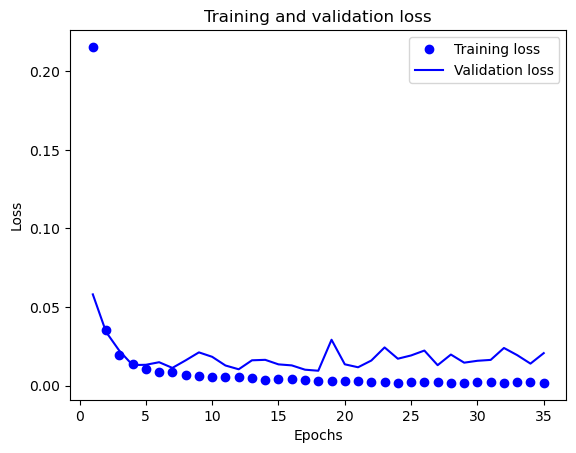

In [313]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

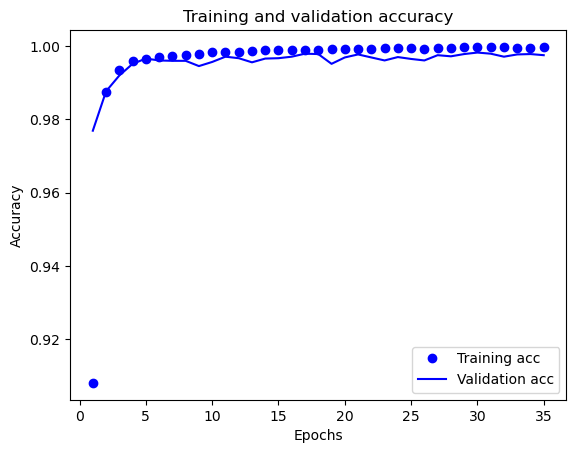

In [314]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [315]:
model = keras.Sequential([
layers.Dense(114, activation="relu"),
layers.Dense(57, activation="relu"),
layers.Dense(29, activation="relu"),
layers.Dense(7, activation="relu"),
layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
loss="binary_crossentropy",
metrics=["accuracy"])
model.fit(X_train, y_train, epochs=6, batch_size=64)
results = model.evaluate(X_test, y_test)

Epoch 1/6
764/764 [==============================] - 7s 5ms/step - loss: 0.1955 - accuracy: 0.9179
Epoch 2/6
764/764 [==============================] - 3s 4ms/step - loss: 0.0268 - accuracy: 0.9909
Epoch 3/6
764/764 [==============================] - 3s 4ms/step - loss: 0.0155 - accuracy: 0.9944
Epoch 4/6
764/764 [==============================] - 3s 4ms/step - loss: 0.0116 - accuracy: 0.9961
Epoch 5/6
764/764 [==============================] - 3s 4ms/step - loss: 0.0085 - accuracy: 0.9974
Epoch 6/6
382/382 [==============================] - 2s 3ms/step - loss: 0.0056 - accuracy: 0.9980


In [316]:
results = model.evaluate(X_test, y_test)

382/382 [==============================] - 1s 3ms/step - loss: 0.0056 - accuracy: 0.9980


In [317]:
results

[0.005596703849732876, 0.9980350136756897]

In [318]:
test_model=model.predict(X_test)

382/382 [==============================] - 1s 3ms/step


In [319]:
print(test_model)

[[6.9931272e-10]
 [1.0000000e+00]
 [4.1662166e-03]
 ...
 [7.5231242e-06]
 [1.0000000e+00]
 [1.3176461e-06]]
